# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"

city = "Pittsburgh"
city_url = f"{url}q={city}&appid={weather_api_key}"
city_url

'https://api.openweathermap.org/data/2.5/weather?q=Pittsburgh&appid=1b95a143844b989636b075aa3ba2f9b7'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inarajan village
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | silifke
Processing Record 5 of Set 1 | okha
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | chabahar
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | aldama
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | dukhan
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | inirida
Processing Record 22 of Set 1 | arroyito
Processing 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inarajan village,13.2736,144.7484,28.55,95,51,4.98,GU,1697666356
1,invercargill,-46.4000,168.3500,12.79,78,98,8.94,NZ,1697666357
2,lihue,21.9789,-159.3672,28.19,64,40,4.12,US,1697666226
3,silifke,36.3778,33.9344,21.43,71,31,3.05,TR,1697666359
4,okha,53.5739,142.9478,6.62,91,100,9.60,RU,1697666360


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inarajan village,13.2736,144.7484,28.55,95,51,4.98,GU,1697666356
1,invercargill,-46.4000,168.3500,12.79,78,98,8.94,NZ,1697666357
2,lihue,21.9789,-159.3672,28.19,64,40,4.12,US,1697666226
3,silifke,36.3778,33.9344,21.43,71,31,3.05,TR,1697666359
4,okha,53.5739,142.9478,6.62,91,100,9.60,RU,1697666360


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

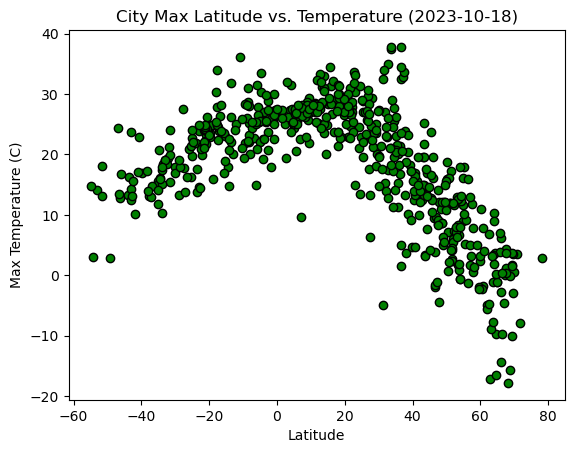

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="green", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

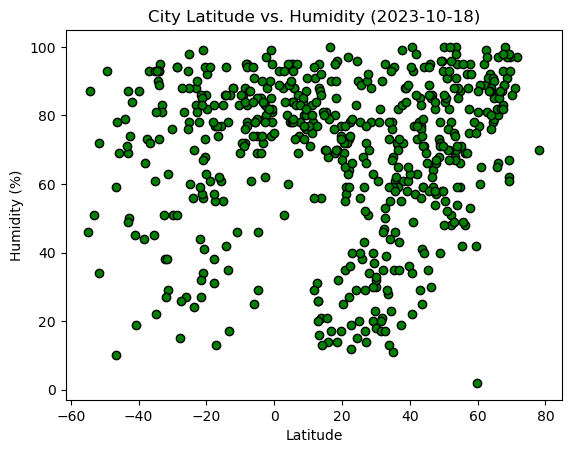

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

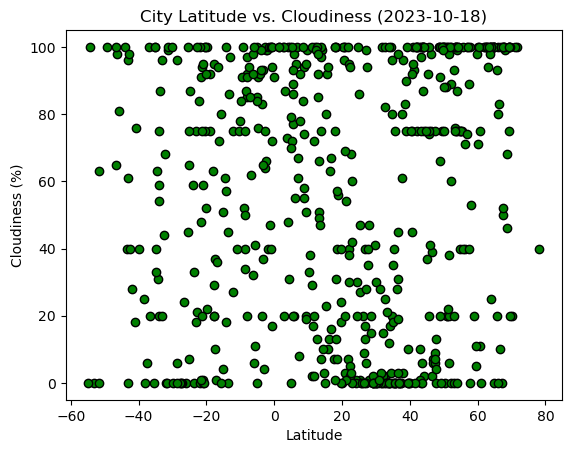

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="green", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

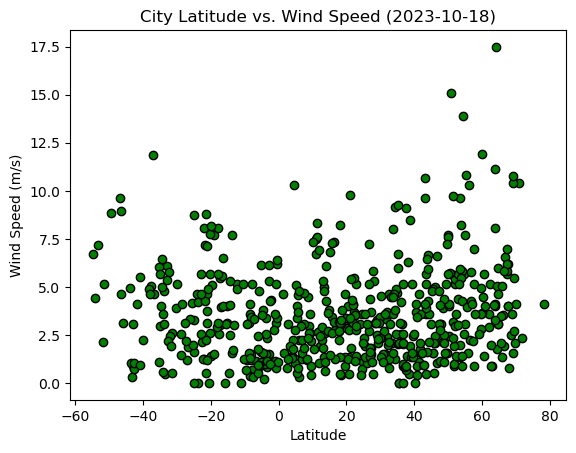

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="green", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, coords):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq, coords, fontsize=15,color="red")
        plt.xlabel('Latitude')
        plt.ylabel(title)
        print(f"The r-squared is: {rvalue**2}")
        plt.show()  

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inarajan village,13.2736,144.7484,28.55,95,51,4.98,GU,1697666356
2,lihue,21.9789,-159.3672,28.19,64,40,4.12,US,1697666226
3,silifke,36.3778,33.9344,21.43,71,31,3.05,TR,1697666359
4,okha,53.5739,142.9478,6.62,91,100,9.60,RU,1697666360
9,tiksi,71.6872,128.8694,-7.81,97,100,2.34,RU,1697666365


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,12.79,78,98,8.94,NZ,1697666357
5,west island,-12.1568,96.8225,24.99,88,75,5.14,CC,1697666361
6,port-aux-francais,-49.3500,70.2167,2.83,93,100,8.85,TF,1697666362
7,puerto ayora,-0.7393,-90.3518,29.98,95,94,3.13,EC,1697666363
8,adamstown,-25.0660,-130.1015,22.74,78,65,3.30,PN,1697666364


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6835393419780139


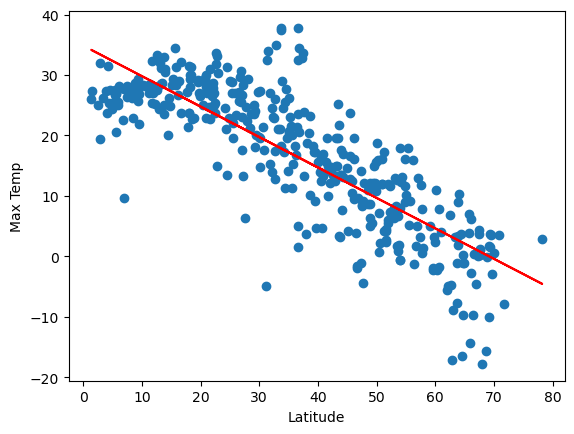

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
lin_reg(x_values, y_values, "Max Temp", (0,260))

The r-squared is: 0.5003597079265751


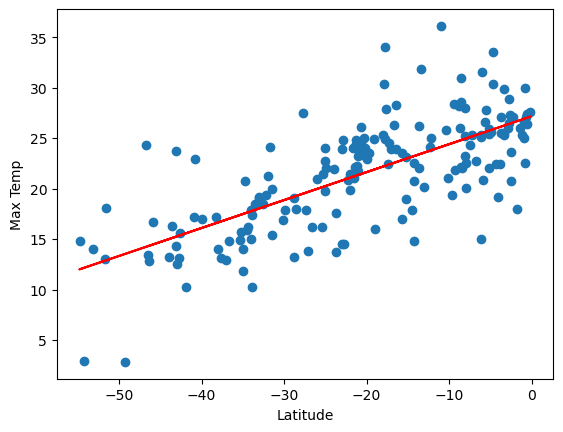

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
lin_reg(x_values, y_values, "Max Temp", (-50,305))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.023670045116814743


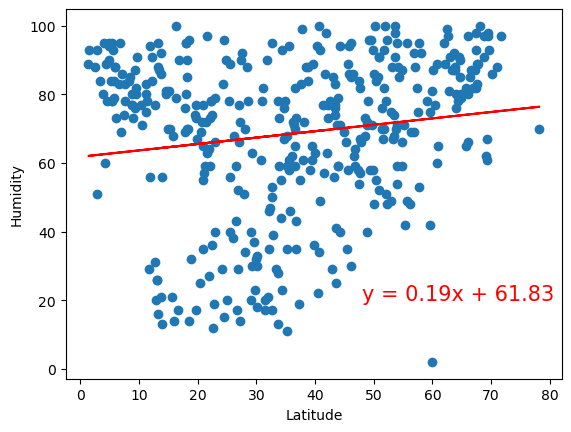

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
lin_reg(x_values, y_values, "Humidity", (48,20))

The r-squared is: 0.05800483166008154


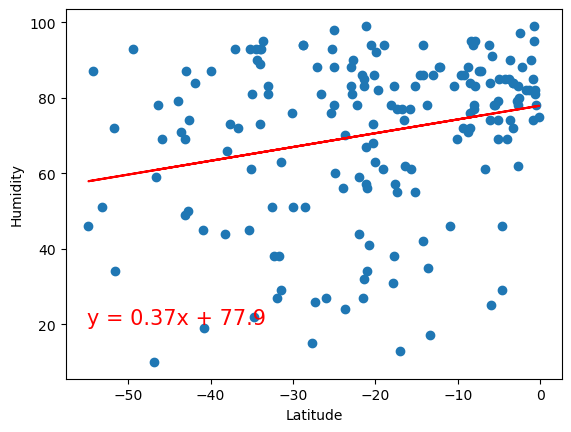

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
lin_reg(x_values, y_values, "Humidity", (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024193951274044535


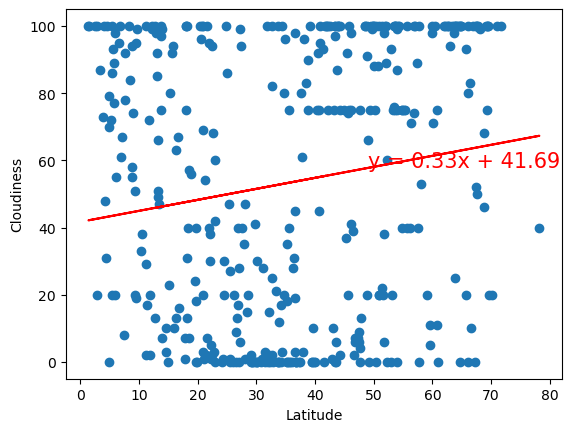

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
lin_reg(x_values, y_values, "Cloudiness", (49,58))

The r-squared is: 0.03615408983468827


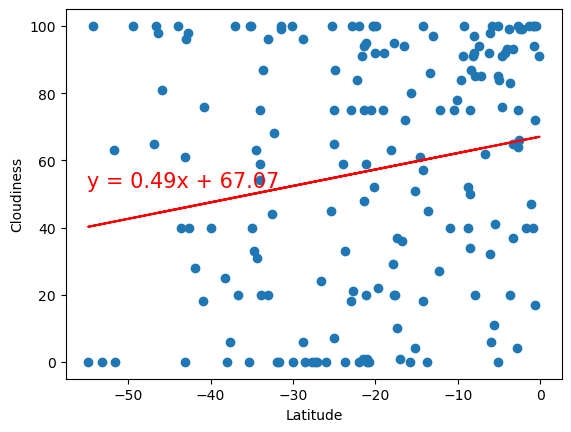

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
lin_reg(x_values, y_values, "Cloudiness", (-55,52))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05655605713065089


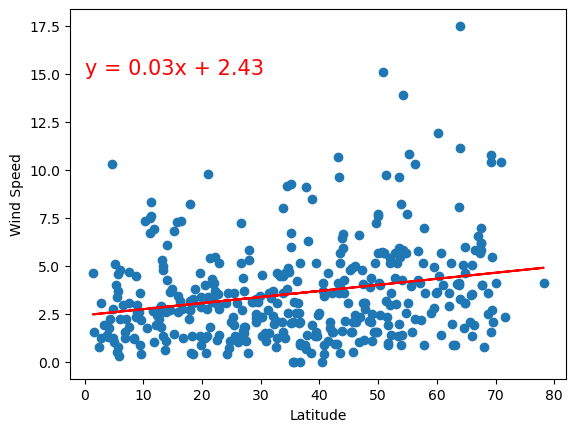

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
lin_reg(x_values, y_values, "Wind Speed", (0,15))

The r-squared is: 0.06762680592920774


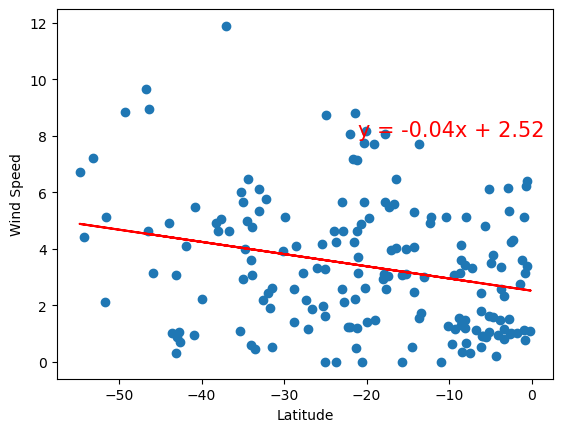

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
lin_reg(x_values, y_values, "Wind Speed", (-21,8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE